# Logistic Regression Example

A logistic regression learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits (http://yann.lecun.com/exdb/mnist/)

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy as np

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [48]:
# data augment here
#plus_matrix=np.eye(28)
#minus_matrix=np.eye(28)
import numpy as np
n_samples=2000

original=mnist.train.images[:n_samples]
new = original+(np.random.normal(size=original.shape, scale = 1/np.sqrt(256)))

original_test = mnist.test.images[:n_samples]
new_test = original_test+(np.random.normal(size=original.shape, scale = 1/np.sqrt(256)))
    
new_train_labels = np.concatenate((mnist.train.labels[:n_samples], mnist.train.labels[:n_samples]))
new_train_images = np.concatenate((original, new))
new_test_labels = np.concatenate((mnist.test.labels[:n_samples], mnist.test.labels[:n_samples]))
new_test_images = np.concatenate((original_test, new_test))

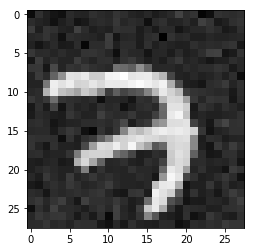

In [58]:
import matplotlib.pyplot as plt

# The rest of columns are pixels
pixels = new_train_images[2000,:]
pixels = pixels.reshape((28, 28))

# Plot
plt.imshow(pixels, cmap='gray')
plt.show()

In [7]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 5

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1)) 

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [53]:
# Start training
CV_accuracy = []
CV_epoch = []
train_cost = []
CV_cost = []
test_accuracy = []
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        #_, avg_cost = sess.run([optimizer, cost], feed_dict={x: new_train_images,
        #                                                  y: new_train_labels})
        _, avg_cost = sess.run([optimizer, cost], feed_dict={x: mnist.train.images[:2*n_samples],
                                                          y: mnist.train.labels[:2*n_samples]})

        train_cost = train_cost + [avg_cost]
        CV_cost = CV_cost + [sess.run(cost, feed_dict = {x: mnist.validation.images, y: mnist.validation.labels})]
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        
        if ((epoch+1)%10 == 0):
            # Test model
            correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
            # Calculate accuracy for CV and test set
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            cv_acc = accuracy.eval({x: mnist.validation.images[:100], y: mnist.validation.labels[:100]})
            test_acc = accuracy.eval({x: new_test_images[:500], y: new_test_labels[:500]})
            CV_accuracy = CV_accuracy + [cv_acc]
            test_accuracy = test_accuracy + [test_acc]
            CV_epoch = CV_epoch + [epoch]
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for test examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Test Accuracy:", accuracy.eval({x: mnist.test.images[5000:], y: mnist.test.labels[5000:]}))

Epoch: 0005 cost= 2.257314682
Epoch: 0010 cost= 2.203473568
Epoch: 0015 cost= 2.152270794
Epoch: 0020 cost= 2.103396893
Epoch: 0025 cost= 2.056632519
Epoch: 0030 cost= 2.011816502
Epoch: 0035 cost= 1.968826532
Epoch: 0040 cost= 1.927559376
Epoch: 0045 cost= 1.887931943
Epoch: 0050 cost= 1.849869847
Epoch: 0055 cost= 1.813305378
Epoch: 0060 cost= 1.778173923
Epoch: 0065 cost= 1.744415164
Epoch: 0070 cost= 1.711973310
Epoch: 0075 cost= 1.680788994
Epoch: 0080 cost= 1.650812745
Epoch: 0085 cost= 1.621988416
Epoch: 0090 cost= 1.594268322
Epoch: 0095 cost= 1.567603707
Epoch: 0100 cost= 1.541945934
Epoch: 0105 cost= 1.517251015
Epoch: 0110 cost= 1.493475556
Epoch: 0115 cost= 1.470577002
Epoch: 0120 cost= 1.448516726
Epoch: 0125 cost= 1.427255511
Epoch: 0130 cost= 1.406756163
Epoch: 0135 cost= 1.386984110
Epoch: 0140 cost= 1.367907643
Epoch: 0145 cost= 1.349492192
Epoch: 0150 cost= 1.331709862
Epoch: 0155 cost= 1.314531326
Epoch: 0160 cost= 1.297928929
Epoch: 0165 cost= 1.281876922
Epoch: 017

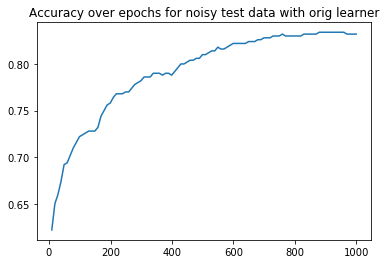

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(CV_epoch,CV_accuracy,label="CV set accuracy")
plt.plot(CV_epoch,test_accuracy,label="Test set accuracy")
plt.title("Accuracy over epochs for noisy test data with orig learner")
#plt.legend()

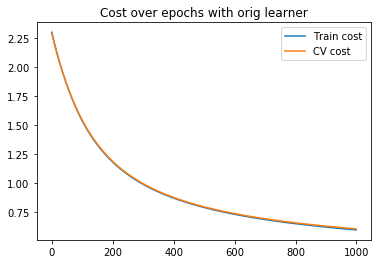

In [56]:
plt.plot(train_cost, label="Train cost")
plt.plot(CV_cost, label="CV cost")
plt.title("Cost over epochs with orig learner")
plt.legend()

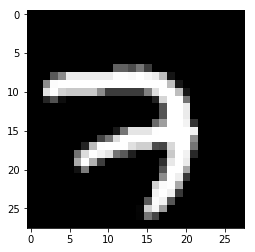

In [5]:
pixels = new_train_images[0,:]
pixels = pixels.reshape((28, 28))

# Plot
plt.imshow(pixels, cmap='gray')
plt.show()